In [1]:
import sys
# to import local fuctions
sys.path.insert(0, '../tools')
import pandas as pd
from datetime import timedelta
import numpy as np

from run_all import main

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

# Running Full Script

In [2]:
# If you want to run it on a small pool of stocks
#trades = main(stocks_path='../docs/my_stocks_test.csv')
# Run for all stocks
trades = main()

Start Update Prices Process ...
Running Incremental Refresh
It took 62 seconds to extract prices.
It took 43 seconds to update PE Ratios and Market Caps.
Running Full Refresh of Indicators. This will take some time.
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Running indicators ...
Exporting Indicators
It took 5.583333333333333 minutes to generate indicators.
Create Buy/Sell Signals
It took 6 seconds to generate Buy and Sell Signals
The whole process took 7.45 minutes.


In [5]:
trades['industry'] = trades['industry'].astype('category')
trades['sector'] = trades['sector'].astype('category')

In [6]:
trades.head()

,index,timestamp,high_price,low_price,open_price,close_price_x,volume,symbol,interval,just_date,name,industry,sector,market_cap,pe_ratio,eps_ttm,cap_cat,low_is_min_7,low_is_min_14,close_price_shift,high_previous,low_previous,close_previous,open_previous,year,daily_return,moving_1d_return,moving_2d_return,moving_3d_return,moving_4d_return,moving_5d_return,moving_7d_return,moving_30d_return_mean,moving_30d_return_std,moving_30d_min_return,moving_60d_return_mean,moving_60d_return_std,moving_60d_min_return,moving_90d_return_mean,moving_90d_return_std,moving_90d_min_return,sma_10d,sma_10d_shift,sma_10d_coef,sma_10d_std,stationary_sma_10d,stationary_sma_10d_zscore,stationary_sma_10d_zscore_shift,stationary_sma_10d_zscore_shift_2,stationary_sma_10d_zscore_min,stationary_sma_10d_zscore_max,sma_20d,sma_20d_shift,sma_20d_coef,sma_20d_std,stationary_sma_20d,stationary_sma_20d_zscore,stationary_sma_20d_zscore_shift,stationary_sma_20d_zscore_shift_2,stationary_sma_20d_zscore_min,stationary_sma_20d_zscore_max,sma_50d,sma_50d_shift,sma_50d_coef,sma_50d_std,stationary_sma_50d,stationary_sma_50d_zscore,stationary_sma_50d_zscore_shift,stationary_sma_50d_zscore_shift_2,stationary_sma_50d_zscore_min,stationary_sma_50d_zscore_max,sma_100d,sma_100d_shift,sma_100d_coef,sma_100d_std,stationary_sma_100d,stationary_sma_100d_zscore,stationary_sma_100d_zscore_shift,stationary_sma_100d_zscore_shift_2,stationary_sma_100d_zscore_min,stationary_sma_100d_zscore_max,sma_200d,sma_200d_shift,sma_200d_coef,sma_200d_std,stationary_sma_200d,stationary_sma_200d_zscore,stationary_sma_200d_zscore_shift,stationary_sma_200d_zscore_shift_2,stationary_sma_200d_zscore_min,stationary_sma_200d_zscore_max,stationary_sma_10d_zscore_min_shift_1,stationary_sma_10d_zscore_min_shift_2,stationary_sma_10d_zscore_min_shift_3,stationary_sma_10d_zscore_min_all,stationary_sma_10d_zscore_min_all_shift,stationary_sma_10d_zscore_min_all_shift_2,stationary_sma_20d_zscore_min_shift_1,stationary_sma_20d_zscore_min_shift_2,stationary_sma_20d_zscore_min_shift_3,stationary_sma_20d_zscore_min_all,stationary_sma_20d_zscore_min_all_shift,stationary_sma_20d_zscore_min_all_shift_2,stationary_sma_100d_zscore_min_shift_1,stationary_sma_100d_zscore_min_shift_2,stationary_sma_100d_zscore_min_shift_3,stationary_sma_100d_zscore_min_all,stationary_sma_100d_zscore_min_all_shift,stationary_sma_100d_zscore_min_all_shift_2,stationary_sma_200d_zscore_min_shift_1,stationary_sma_200d_zscore_min_shift_2,stationary_sma_200d_zscore_min_shift_3,stationary_sma_200d_zscore_min_all,stationary_sma_200d_zscore_min_all_shift,stationary_sma_200d_zscore_min_all_shift_2,sma_10d_20d_ratio,sma_10d_20d_ratio_shift,sma_10d_20d_ratio_shift_2,sma_10d_20d_ratio_shift_3,sma_10d_20d_ratio_coef_2d,sma_10d_20d_ratio_avg,sma_10d_20d_ratio_std,sma_10d_20d_ratio_2std_up,sma_10d_20d_ratio_2std_down,sma_10d_20d_ratio_2std_up_diff,sma_10d_20d_ratio_2std_down_diff,sma_10d_20d_ratio_15std_up,sma_10d_20d_ratio_15std_down,sma_10d_20d_ratio_15std_up_diff,sma_10d_20d_ratio_15std_down_diff,sma_10d_20d_ratio_1std_up,sma_10d_20d_ratio_1std_down,sma_10d_20d_ratio_1std_up_diff,sma_10d_20d_ratio_1std_down_diff,sma_10d_50d_ratio,sma_10d_50d_ratio_shift,sma_10d_50d_ratio_shift_2,sma_10d_50d_ratio_shift_3,sma_10d_50d_ratio_coef_2d,sma_10d_50d_ratio_avg,sma_10d_50d_ratio_std,sma_10d_50d_ratio_2std_up,sma_10d_50d_ratio_2std_down,sma_10d_50d_ratio_2std_up_diff,sma_10d_50d_ratio_2std_down_diff,sma_10d_50d_ratio_15std_up,sma_10d_50d_ratio_15std_down,sma_10d_50d_ratio_15std_up_diff,sma_10d_50d_ratio_15std_down_diff,sma_10d_50d_ratio_1std_up,sma_10d_50d_ratio_1std_down,sma_10d_50d_ratio_1std_up_diff,sma_10d_50d_ratio_1std_down_diff,sma_10d_100d_ratio,sma_10d_100d_ratio_shift,sma_10d_100d_ratio_shift_2,sma_10d_100d_ratio_shift_3,sma_10d_100d_ratio_coef_2d,sma_10d_100d_ratio_avg,sma_10d_100d_ratio_std,sma_10d_100d_ratio_2std_up,sma_10d_100d_ratio_2std_down,sma_10d_100d_ratio_2std_up_diff,sma_10d_100d_ratio_2std_down_diff,sma_10d_100d_ratio_15std_up,sma_10d_100d_ratio

In [10]:
trades[trades['just_date'] == trades.iloc[-1]['just_date']].groupby(['sector', 'cap_cat']).mean()['pe_ratio'].reset_index()

,sector,cap_cat,pe_ratio
0,Advertising Agencies,small,NaN
1,Advertising Agencies,mid,13.586000
2,Advertising Agencies,big,9.074000
3,Aerospace & Defense,small,NaN
4,Aerospace & Defense,mid,19.123750
5,Aerospace & Defense,big,71.945750
6,Agricultural Inputs,small,NaN
7,Agricultural Inputs,mid,32.400500
8,Agricultural Inputs,big,16.075000
9,Airlines,small,NaN


In [52]:
to_plot = trades[(trades['sector'] == 'Semiconductors')][['just_date', 'symbol', 'pe_ratio']]
to_plot[to_plot['symbol'] == 'MU']

,just_date,symbol,pe_ratio
0,2017-01-25 00:00:00,MU,168.286
1,2017-01-26 00:00:00,MU,168.000
2,2017-01-27 00:00:00,MU,171.214
3,2017-01-30 00:00:00,MU,172.714
4,2017-01-31 00:00:00,MU,172.214
5,2017-02-01 00:00:00,MU,176.786
6,2017-02-02 00:00:00,MU,177.071
7,2017-02-03 00:00:00,MU,175.714
8,2017-02-06 00:00:00,MU,173.857
9,2017-02-07 00:00:00,MU,175.714


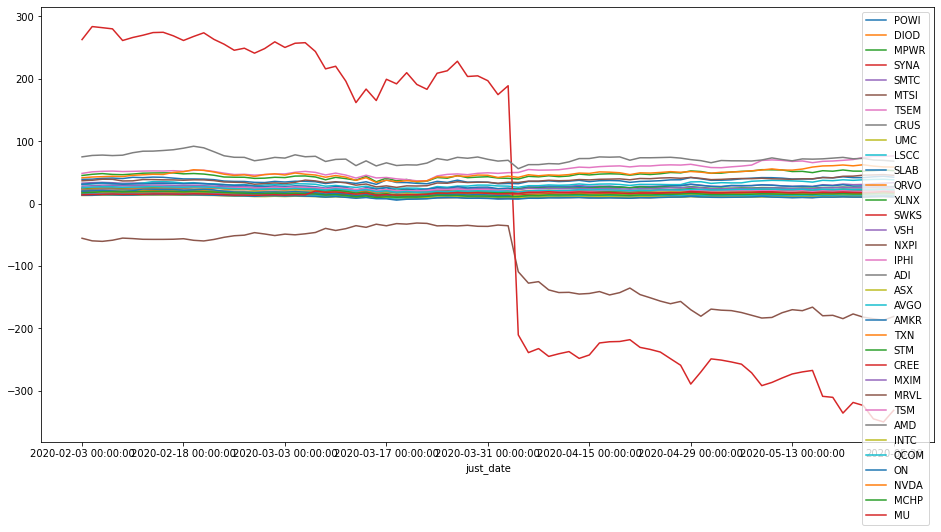

In [51]:
to_plot = trades[(trades['sector'] == 'Semiconductors') & (trades['just_date'] > '2020-02-01')][['just_date', 'symbol', 'pe_ratio']]
to_plot.set_index('just_date', inplace=True)

for i in to_plot['symbol'].unique():
    to_plot[to_plot['symbol'] == i]['pe_ratio'].plot(figsize=(16,8), label=i)

plt.legend();



In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
price_pe = pd.read_csv('../docs/pe_prices.csv')
price_pe['market_cap_no'] = price_pe['market_cap'].str.replace('B', '')
price_pe['market_cap_no'] = pd.to_numeric(price_pe['market_cap_no'])
price_pe['market_cap_no'] = price_pe['market_cap_no']
max_date = price_pe.iloc[-1]['just_date']
market_cap = price_pe[price_pe['just_date'] == max_date]
market_cap['shs_outstanding'] = market_cap['market_cap_no'] / market_cap['close_price']
market_cap = market_cap[['just_date', 'symbol', 'shs_outstanding']]
price_pe = pd.merge(price_pe, market_cap, on=['just_date', 'symbol'], how='left')
price_pe['shs_outstanding'] = price_pe.groupby('symbol').bfill()['shs_outstanding']
price_pe['market_cap'] = price_pe['shs_outstanding'] * price_pe['close_price']

price_pe.drop(['market_cap_no', 'shs_outstanding'], inplace=True, axis=1)

In [31]:
price_pe[price_pe['symbol'] == 'A']

,timestamp,high_price,low_price,open_price,close_price,volume,symbol,interval,just_date,name,industry,sector,market_cap,just_date_merge,timestamp_merge,pe_ratio,eps_ttm
0,2017-01-03 14:30:00,46.750000,45.740002,45.930000,46.490002,1739600.0,A,1d,2017-01-03 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,14.329367,2017-01-03 00:00:00,NaN,23.480,1.98
1,2017-01-04 14:30:00,47.380001,46.820000,46.930000,47.099998,1821300.0,A,1d,2017-01-04 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,14.517383,2017-01-04 00:00:00,NaN,23.788,1.98
2,2017-01-05 14:30:00,47.070000,46.360001,47.049999,46.540001,1503700.0,A,1d,2017-01-05 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,14.344778,2017-01-05 00:00:00,NaN,23.505,1.98
3,2017-01-06 14:30:00,48.070000,46.560001,46.630001,47.990002,2883400.0,A,1d,2017-01-06 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,14.791704,2017-01-06 00:00:00,2017-01-06 00:00:00,24.237,1.98
4,2017-01-09 14:30:00,48.560001,47.910000,48.009998,48.139999,2575300.0,A,1d,2017-01-09 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,14.837937,2017-01-09 00:00:00,NaN,24.313,1.98
5,2017-01-10 14:30:00,48.540001,47.820000,48.340000,48.099998,1560500.0,A,1d,2017-01-10 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,14.825608,2017-01-10 00:00:00,NaN,24.293,1.98
6,2017-01-11 14:30:00,49.480000,47.950001,48.029999,49.250000,5624300.0,A,1d,2017-01-11 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,15.180066,2017-01-11 00:00:00,NaN,24.874,1.98
7,2017-01-12 14:30:00,48.900002,47.980000,48.900002,48.520000,3276900.0,A,1d,2017-01-12 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,14.955063,2017-01-12 00:00:00,NaN,24.505,1.98
8,2017-01-13 14:30:00,48.849998,48.410000,48.599998,48.689999,1568500.0,A,1d,2017-01-13 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,15.007460,2017-01-13 00:00:00,2017-01-13 00:00:00,24.591,1.98
9,2017-01-17 14:30:00,48.720001,48.180000,48.369999,48.320000,1938800.0,A,1d,2017-01-17 00:00:00,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,14.893417,2017-01-17 00:00:00,NaN,24.404,1.98


In [7]:
industry = price[['symbol', 'industry']].drop_duplicates()
eps_industry = pd.merge(eps, industry, on='symbol')
eps_industry.dropna(subset=['eps'], inplace=True)
eps_industry['timestamp'] = pd.to_datetime(eps_industry['timestamp'])
eps_industry['just_date'] = eps_industry['timestamp'].dt.date
eps_industry['pe_ratio'] = eps_industry['pe_ratio'].round(4)
pe_ratio = eps_industry.groupby(['just_date', 'industry']).mean()['pe_ratio'].reset_index()
pe_ratio['pe_ratio'] = pe_ratio['pe_ratio'].astype(object)
pe_ratio.columns = ['timestamp', 'industry', 'pe_industry_avg']
#final = pd.merge(eps_industry, pe_ratio, on=['timestamp', 'industry'])

In [12]:
eps2[eps2['symbol'] == 'BP']

,timestamp,eps,symbol
51260,2015-06-30,-1.9098,BP
51261,2015-09-30,0.0150,BP
51262,2015-12-31,-1.0806,BP
51263,2016-03-31,-0.1896,BP
51264,2016-06-30,-0.4560,BP
51265,2016-09-30,0.5136,BP
51266,2016-12-31,0.1560,BP
51267,2017-03-31,0.4428,BP
51268,2017-06-30,0.0432,BP
51269,2017-09-30,0.5340,BP


In [9]:
eps_industry[eps_industry['symbol'] == 'BP']

,timestamp,symbol,eps,ttm_eps,pe_ratio,industry,just_date
192296,2017-01-03 14:30:00,BP,0.1560,0.0240,1583.3333,Energy,2017-01-03
192297,2017-01-04 14:30:00,BP,0.1560,0.0240,1595.4167,Energy,2017-01-04
192298,2017-01-05 14:30:00,BP,0.1560,0.0240,1607.0833,Energy,2017-01-05
192299,2017-01-06 14:30:00,BP,0.1560,0.0240,1579.5833,Energy,2017-01-06
192300,2017-01-09 14:30:00,BP,0.1560,0.0240,1554.5834,Energy,2017-01-09
192301,2017-01-10 14:30:00,BP,0.1560,0.0240,1546.2500,Energy,2017-01-10
192302,2017-01-11 14:30:00,BP,0.1560,0.0240,1564.5833,Energy,2017-01-11
192303,2017-01-12 14:30:00,BP,0.1560,0.0240,1573.3333,Energy,2017-01-12
192304,2017-01-13 14:30:00,BP,0.1560,0.0240,1569.1667,Energy,2017-01-13
192305,2017-01-17 14:30:00,BP,0.1560,0.0240,1559.9999,Energy,2017-01-17


In [17]:
eps_industry[(eps_industry['industry'] == 'Energy') & (eps_industry['timestamp'] > '2018-01-01')].sort_values('timestamp').head(100)

,timestamp,symbol,eps,ttm_eps,pe_ratio,industry,just_date
66955,2018-01-02 14:30:00,AM,0.0300,2.230000e-02,9.286995e+02,Energy,2018-01-02
917292,2018-01-02 14:30:00,PAA,0.1900,9.700000e-01,2.194850e+01,Energy,2018-01-02
566533,2018-01-02 14:30:00,HESM,0.2600,1.896500e+00,1.105190e+01,Energy,2018-01-02
859273,2018-01-02 14:30:00,NOV,-0.0400,-6.300000e-01,-5.841270e+01,Energy,2018-01-02
620649,2018-01-02 14:30:00,IMO,-0.1258,4.528000e-01,6.974380e+01,Energy,2018-01-02
819004,2018-01-02 14:30:00,MUR,-1.6600,-1.800000e+00,-1.786110e+01,Energy,2018-01-02
796405,2018-01-02 14:30:00,MPLX,0.3100,1.050000e+00,3.432380e+01,Energy,2018-01-02
726100,2018-01-02 14:30:00,LNG,0.5400,-1.700000e+00,-3.217650e+01,Energy,2018-01-02
1156610,2018-01-02 14:30:00,TCP,0.7700,3.160000e+00,1.704750e+01,Energy,2018-01-02
346612,2018-01-02 14:30:00,CZZ,0.3830,5.794000e-01,1.762170e+01,Energy,2018-01-02


In [40]:
pe_ratio.columns

Index(['timestamp', 'industry', 'pe_industry_avg'], dtype='object')

In [13]:
to_plot = pe_ratio.copy()
to_plot.set_index('timestamp', inplace=True)
to_plot['pe_industry_avg'] = to_plot['pe_industry_avg'].replace([np.inf, -np.inf], np.nan)
to_plot['pe_industry_avg'].fillna(0, inplace=True)
to_plot['pe_industry_avg'] = to_plot['pe_industry_avg'].astype('int64')
to_plot.head()


,industry,pe_industry_avg
timestamp,,
2017-01-03,Basic Materials,0
2017-01-03,Communication Services,0
2017-01-03,Consumer Cyclical,21
2017-01-03,Consumer Defensive,11
2017-01-03,Energy,9


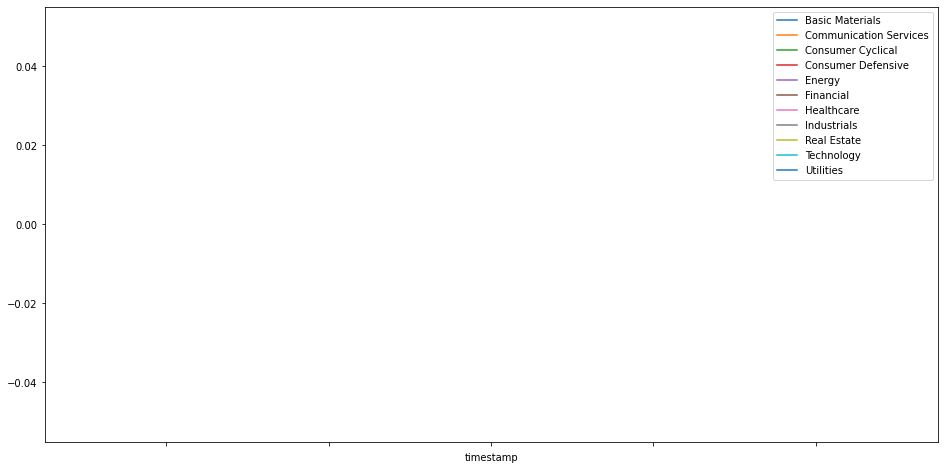

In [15]:
for industry in to_plot['industry'].unique():
    to_plot[to_plot['industry'] == 'industry']['pe_industry_avg'].plot(figsize=(16,8),label=industry)
    
plt.legend();

In [16]:
to_plot[to_plot['industry'] == 'Energy']['pe_industry_avg']

timestamp
2017-01-03                  9
2017-01-04                  9
2017-01-05                  9
2017-01-06                  9
2017-01-09                  9
2017-01-10                  8
2017-01-11                  9
2017-01-12                  9
2017-01-13                  8
2017-01-17                  8
2017-01-18                  8
2017-01-19                  8
2017-01-20                  8
2017-01-23                  8
2017-01-24                  8
2017-01-25                  8
2017-01-26                  8
2017-01-27                  8
2017-01-30                  8
2017-01-31                  8
2017-02-01                  8
2017-02-02                  8
2017-02-03                  8
2017-02-06                  7
2017-02-07                  7
2017-02-08                  7
2017-02-09                  7
2017-02-10                  6
2017-02-13                  7
2017-02-14                  6
2017-02-15                  6
2017-02-16                  6
2017-02-17                  6


## See Trades generated

In [6]:
def show_me_trades(no_of_days, buy_signal, clean_data):
    
    # Define min date
    min_date = clean_data['timestamp'].max() - timedelta(days=no_of_days)
    
    relevant_columns = ['timestamp', 'symbol','name', 'industry', 'next_7d_return', 'next_14d_return', 'next_21d_return']

    # Create Metrics
    metrics = clean_data[(clean_data[buy_signal] == True)][relevant_columns]
    metrics['year'] = pd.DatetimeIndex(metrics['timestamp']).year
    metrics_a = metrics.groupby(['symbol', 'name', 'industry', 'year']).count()['timestamp'].reset_index()
    metrics_b = metrics.groupby(['symbol', 'name', 'industry', 'year']).mean()[['next_7d_return', 'next_14d_return', 'next_21d_return']].reset_index()
    metrics = pd.merge(metrics_a, metrics_b, on=['symbol', 'name', 'industry', 'year'])

    # Create set of good symbols
    list_of_good = set(metrics[(metrics['next_14d_return'] > 1) & (metrics['next_21d_return'] > 1) & (metrics['year'] >= 2019)]['symbol'])

    # Run for the past 5 days
    print('Only with past record')
    display(clean_data[(clean_data['timestamp'] > min_date) & (clean_data[buy_signal] == True) & (clean_data['symbol'].isin(list_of_good))][['timestamp', 'symbol', 'next_7d_return', 'next_14d_return', 'next_21d_return', 'close_price_x']])
    print('Everything')
    display(clean_data[(clean_data['timestamp'] > min_date) & (clean_data[buy_signal] == True)][['timestamp', 'symbol', 'next_7d_return', 'next_14d_return', 'next_21d_return']])

    # Last days buys
    last_days_symbol = set(clean_data[(clean_data['timestamp'] > min_date) & (clean_data[buy_signal] == True) & (clean_data['symbol'].isin(list_of_good))]['symbol'])
    display(metrics[metrics['symbol'].isin(last_days_symbol)].sort_values('symbol'))

In [7]:
show_me_trades(2, 'buy_signal?1', trades)


Only with past record


,timestamp,symbol,next_7d_return,next_14d_return,next_21d_return,close_price_x
838,2020-05-26 13:30:00,CSGS,NaN,NaN,NaN,47.169998
838,2020-05-26 13:30:00,ATEC,NaN,NaN,NaN,4.600000
838,2020-05-26 13:30:00,CUBI,NaN,NaN,NaN,10.910000


Everything


,timestamp,symbol,next_7d_return,next_14d_return,next_21d_return
838,2020-05-26 13:30:00,CSGS,NaN,NaN,NaN
838,2020-05-26 13:30:00,ATEC,NaN,NaN,NaN
838,2020-05-26 13:30:00,CUBI,NaN,NaN,NaN


,symbol,name,industry,year,timestamp,next_7d_return,next_14d_return,next_21d_return
11,ATEC,"Alphatec Holdings, Inc.",Healthcare,2017,15,0.983573,1.030661,1.071332
12,ATEC,"Alphatec Holdings, Inc.",Healthcare,2018,5,0.999368,1.045615,1.071569
13,ATEC,"Alphatec Holdings, Inc.",Healthcare,2019,2,1.252517,1.711694,1.881271
14,ATEC,"Alphatec Holdings, Inc.",Healthcare,2020,6,0.990071,0.999031,0.978621
56,CSGS,"CSG Systems International, Inc.",Technology,2017,13,0.983070,0.981116,0.988738
57,CSGS,"CSG Systems International, Inc.",Technology,2018,10,1.026576,1.034342,1.006891
58,CSGS,"CSG Systems International, Inc.",Technology,2019,2,1.046276,1.094179,1.127985
59,CSGS,"CSG Systems International, Inc.",Technology,2020,6,1.000957,1.050657,1.063398
65,CUBI,"Customers Bancorp, Inc.",Financial,2017,14,1.013013,1.003525,1.021757
66,CUBI,"Customers Bancorp, Inc.",Financial,2018,16,0.967230,0.945721,0.949877
